# Challenge MDI341 2019

## Name : Valentin PHETCHANPHENG

## Mail : vphetchanpheng@gmail.com

## Note : Work done with google colab

## Goal :
The goal of this challenge is to develop a binary classification system which tries to detect if an image contains some property not (you can try to discover what these "properties" are).

## Dataset :

####  Training data :

The training set contains raw images and their labels. There are 116 157 images in this dataset. Each image is of size 56 x 56 x 3 (the last dimension encodes the color information: red-green-blue). For each image there is a label, either 0 or 1.

#### Validation data :

The validation set only contains raw images. There are 27 013 images in this dataset, where the image format is the same as before. The labels of this dataset will not be provided. Within the first phase, your ranks will be calculated based on this dataset.

#### Test data :

The test set only contains raw images as well. There will be 59 429 images in this dataset, where the image format is the same as before. The labels of this dataset will not be provided either. This dataset will be provided only in the second phase: only a couple of hours before the challenge deadline. Your final ranks will be calculated based on this dataset.

# Load Data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://www.dropbox.com/s/486li09u91zyjdm/db_train.raw?dl=1

--2019-04-05 13:17:51--  https://www.dropbox.com/s/486li09u91zyjdm/db_train.raw?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/486li09u91zyjdm/db_train.raw [following]
--2019-04-05 13:17:51--  https://www.dropbox.com/s/dl/486li09u91zyjdm/db_train.raw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc80298fff94473ec54eddde8eed.dl.dropboxusercontent.com/cd/0/get/AednC78gE0W72V09fgqnGwAkCoMrXDf6-Id6z7auwKrZysB0q_WGlRyX-_bgPjmEpOHvfDzONczfmCnlT-e8Ld5FoHqNzJ4YsoHbbYL-zWqxiVJlCsCJqkVTBylrSiwECEU/file?dl=1# [following]
--2019-04-05 13:17:51--  https://uc80298fff94473ec54eddde8eed.dl.dropboxusercontent.com/cd/0/get/AednC78gE0W72V09fgqnGwAkCoMrXDf6-Id6z7auwKrZysB0q_WGlRyX-_bgPjmEpOHvfDzONczfmCnlT-e8Ld5FoHqNzJ4YsoHbbYL-zWqxiVJl

In [0]:
!wget https://www.dropbox.com/s/d2hsorvtla3rtf9/label_2019_train.txt?dl=1

--2019-04-05 13:18:43--  https://www.dropbox.com/s/d2hsorvtla3rtf9/label_2019_train.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/d2hsorvtla3rtf9/label_2019_train.txt [following]
--2019-04-05 13:18:43--  https://www.dropbox.com/s/dl/d2hsorvtla3rtf9/label_2019_train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc955e13bf424ac10b054f7ce8fc.dl.dropboxusercontent.com/cd/0/get/AecQIL28ICNe2vup48cbkzMPLIOug8QvNMc4ydbqVaZdV2TJhLn1gXGa0bXmdJ2UhIr_Ohe4Tv5UPMCmqOGtytUwE4Y2VkGSKUmfK3gGeIw-K4CUV_bTeimEkBE_xjtEuGQ/file?dl=1# [following]
--2019-04-05 13:18:43--  https://uc955e13bf424ac10b054f7ce8fc.dl.dropboxusercontent.com/cd/0/get/AecQIL28ICNe2vup48cbkzMPLIOug8QvNMc4ydbqVaZdV2TJhLn1gXGa0bXmdJ2UhIr_Ohe4Tv5UPMCmqOGtytUw

In [0]:
!wget https://www.dropbox.com/s/mnido8qbwmbi79h/db_test.raw?dl=1

--2019-04-05 13:19:21--  https://www.dropbox.com/s/mnido8qbwmbi79h/db_test.raw?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/mnido8qbwmbi79h/db_test.raw [following]
--2019-04-05 13:19:21--  https://www.dropbox.com/s/dl/mnido8qbwmbi79h/db_test.raw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca3525e0cb93eb5ca806711b1f6.dl.dropboxusercontent.com/cd/0/get/AefhUchgAD7ijdJPVhe9qZZSXrRDeedR8hjtkzAFIeA8LUdG51aTl_8xSKF39oWvV-bRFWAf1Pm_8xM3zNJ0zmdZIIHdr0FPPHT_nRMUC4Q142XmGhgl3P2iOK4_Rtnx9F0/file?dl=1# [following]
--2019-04-05 13:19:22--  https://uca3525e0cb93eb5ca806711b1f6.dl.dropboxusercontent.com/cd/0/get/AefhUchgAD7ijdJPVhe9qZZSXrRDeedR8hjtkzAFIeA8LUdG51aTl_8xSKF39oWvV-bRFWAf1Pm_8xM3zNJ0zmdZIIHdr0FPPHT_nRMUC4Q142XmGhg

In [0]:
!mv db_train.raw?dl=1 db_train.raw
!mv db_test.raw?dl=1 db_test.raw
!mv label_2019_train.txt?dl=1 label_2019_train.txt

# Code

In [0]:
# Import libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten, Dropout, Activation
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers

## Loading and investigating the data

In [0]:
# Train images
train_images_fname = 'db_train.raw'

# Train labels
train_labels_fname = 'label_2019_train.txt'

# Validation/Test images
val_images_fname = 'db_test.raw'


# Number of images
num_train_images = 116157
num_valid_images = 59429


# Size of the images 56*56 pixels with 3 channels (rgb)
image_dim = 56 * 56 * 3
img_size = 56

train_images_label = np.loadtxt(train_labels_fname, dtype=np.float64)

with open(train_images_fname, 'rb') as f:
    train_images_data = np.fromfile(f, dtype=np.uint8, count=num_train_images * image_dim).astype(np.float32)
    train_images_data = train_images_data.reshape(num_train_images, image_dim)
    
with open(val_images_fname, 'rb') as f:
    val_images_data = np.fromfile(f, dtype=np.uint8, count=num_valid_images * image_dim).astype(np.float32)
    val_images_data = val_images_data.reshape(num_valid_images, image_dim)
    

In [0]:
print("Dimension train_images_data : ", train_images_data.shape)
print("Dimension val_images_data : ", val_images_data.shape)

Dimension train_images_data :  (116157, 9408)
Dimension val_images_data :  (59429, 9408)


In [0]:
print("train_images_data : \n", train_images_data, "\n")
print("val_images_data : \n", val_images_data, "\n")
print("train_images_label : \n", train_images_label)

train_images_data : 
 [[156. 148. 145. ...  33.  29.  26.]
 [140. 105.  76. ...  23.  24.  18.]
 [ 67.  69.  74. ...  58.  62.  73.]
 ...
 [167. 167. 165. ... 100. 101.  92.]
 [ 34.  50.  67. ...  32.  84. 144.]
 [  6.   7.  12. ... 131. 125. 149.]] 

val_images_data : 
 [[ 92.  69.  34. ... 120.  90.  56.]
 [170. 162. 145. ...  20.  12.  15.]
 [ 67.  65.  70. ... 210. 195. 188.]
 ...
 [189. 175. 154. ... 148. 133.  98.]
 [203. 201. 202. ...  41.  42.  33.]
 [  8.   3.   0. ...   7.   3.   0.]] 

train_images_label : 
 [1. 1. 0. ... 0. 0. 1.]


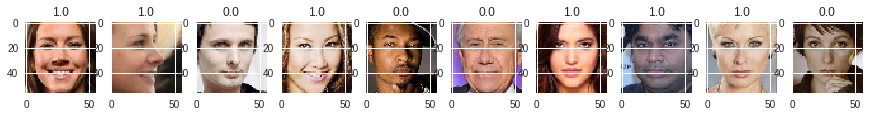

In [0]:
# Look at some images from train set and check the labels associated
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 6))

labels = []
for i, ax in enumerate(axes):
    labels.append(train_images_label[i])

for i, ax in enumerate(axes):
    ax.imshow(train_images_data[i].reshape(56, 56,3).astype(np.uint8))
    ax.set_title(labels[i])

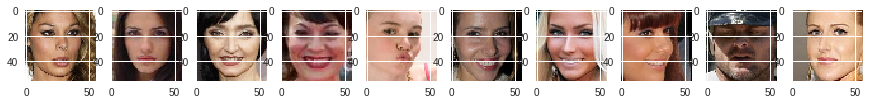

In [0]:
# Look at some images from test set and check the labels associated 
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 6))

for i, ax in enumerate(axes):
    ax.imshow(val_images_data[i].reshape(56, 56,3).astype(np.uint8))

In [0]:
# Check rgb channels of the image1 from train set for some value of the matrix
print(train_images_data.reshape(num_train_images, 56, 56, 3)[1][0,0,:])
print(train_images_data.reshape(num_train_images, 56, 56, 3)[1][1,1,:])

[140. 105.  76.]
[153. 120.  89.]


In [0]:
# For each image we get the pixel color value from the first line of the matrix
red = []
green = []
blue = []

for i in range(0,train_images_data.shape[0]):
    red.append(train_images_data.reshape(num_train_images, 56, 56, 3)[i][0,:,0])
    green.append(train_images_data.reshape(num_train_images, 56, 56, 3)[i][0,:,1])
    blue.append(train_images_data.reshape(num_train_images, 56, 56, 3)[i][0,:,2])
  
red = np.array(red).flatten().tolist()
green = np.array(green).flatten().tolist()
blue = np.array(blue).flatten().tolist()

In [0]:
rgb = pd.DataFrame({'red':red, 'green':green, 'blue':blue})
rgb.head(10)

,blue,green,red
0,145.0,148.0,156.0
1,141.0,147.0,152.0
2,131.0,141.0,148.0
3,144.0,155.0,166.0
4,79.0,93.0,115.0
5,28.0,42.0,73.0
6,21.0,36.0,69.0
7,39.0,58.0,88.0
8,16.0,38.0,66.0
9,41.0,66.0,95.0


In [0]:
# Each pixel colors has 256 values from 0 to 255
print("Number of unique value for each channel :\n", rgb.nunique(), "\n")
print("Max value for each channel :\n", rgb.max(), "\n")
print("Min value for each channel :\n", rgb.min())

Number of unique value for each channel :
 blue     256
green    256
red      256
dtype: int64 

Max value for each channel :
 blue     255.0
green    255.0
red      255.0
dtype: float64 

Min value for each channel :
 blue     0.0
green    0.0
red      0.0
dtype: float64


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution de blue')

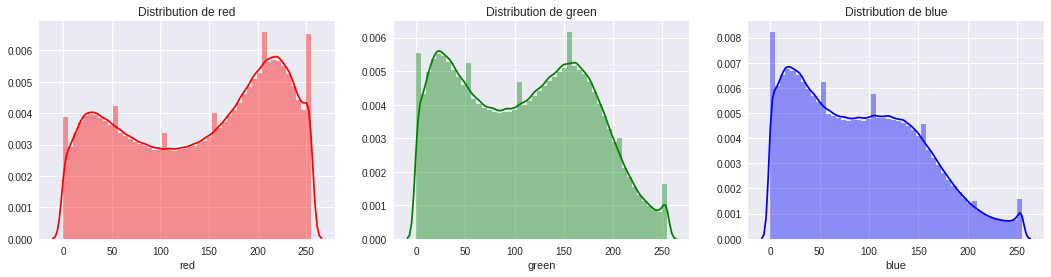

In [0]:
# Distribution of each pixel color from first line of matrix
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.distplot(rgb.red, color='red')
plt.title("Distribution de red")

plt.subplot(1,3,2)
sns.distplot(rgb.green, color='green')
plt.title("Distribution de green")

plt.subplot(1,3,3)
sns.distplot(rgb.blue, color='blue')
plt.title("Distribution de blue")

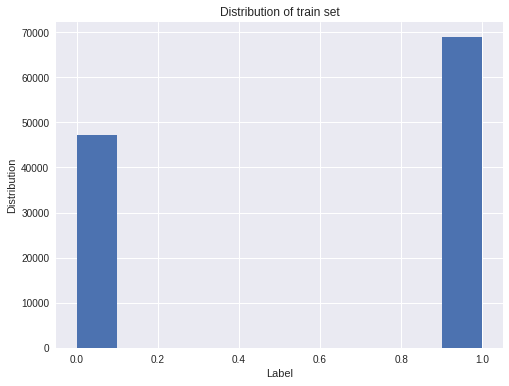

In [0]:
plt.figure(figsize=(8,6))
plt.hist(train_images_label, bins=10)
plt.title('Distribution of train set')
plt.xlabel('Label')
plt.ylabel('Distribution')
plt.show()

In the train set, data are mainly labeled as 1 but the dataset is not that unbalanced.

In [0]:
df_train = pd.DataFrame(train_images_data)
df_test = pd.DataFrame(val_images_data)
df_train = df_train.drop_duplicates()

I tried to drop duplicates but everytime it failed because of the RAM.

## Pre processing

In [0]:
# Normalizing the RGB codes by dividing it to the max RGB value and values range into [0:1]
train_images_data = train_images_data / 255.0
val_images_data = val_images_data / 255.0

In [0]:
# Reshaping data (56, 56, 3) 
train_images_data = train_images_data.reshape(num_train_images, 56, 56, 3)
val_images_data = val_images_data.reshape(num_valid_images, 56, 56, 3)

In [0]:
# Other normalization method and values range into [-1:1]
mean = np.mean(train_images_data,axis=(0,1,2,3))
std = np.std(train_images_data,axis=(0,1,2,3))
train_images_data = (train_images_data-mean)/(std+1e-7)
val_images_data = (val_images_data-mean)/(std+1e-7)

I tried different ways to scale and normalize data :
- First method was dividing values by 255 so that values range into [0:1]
- Second method was scaling by the mean and dividing by the standard deviation for each channel so that values range into [-1:1]

I finally decided to normalize data using the first method that gives the best accuracy.

Then, I reshaped data into (56, 56, 3).

## Train Test Split

I split the training data into a train (80%) and test set (20%).

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_images_data, train_images_label, test_size=0.2, random_state=32)

# CNN Model

## Model

For this challenge, I implemented a convolutional neural network with : 
- 2 CONV layer with 32 filters
- 2 CONV layer with 64 filters
- 1 CONV layer with 128 filters 

I also added max pooling layers.

To prevent overfitting I used L2 regularization and dropout. 

The detailed structure is defined below :

In [0]:
weight_decay = 1e-4

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(56,56,3), kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())  
model.add(Dense(100, kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation("sigmoid"))   # binary classification

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 56, 56, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_v

In [0]:
import os

# Using colab TPU
model = tf.contrib.tpu.keras_to_tpu_model(
   model,
   strategy=tf.contrib.tpu.TPUDistributionStrategy(
       tf.contrib.cluster_resolver.TPUClusterResolver(
           tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
   )
)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.72.38.162:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 8253711054093970467)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 8888777531997335837)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 1136553123353044212)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1,

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

## Fit the model on train-test split

In [0]:
import time

start_time = time.time()

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=15, batch_size=32, verbose=1)

print("--- %s seconds ---" % (time.time() - start_time))

Train on 92925 samples, validate on 23232 samples
Epoch 1/15
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(4,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(4, 56, 56, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(4, 1), dtype=tf.float32, name='activation_6_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for conv2d_input
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f6417b33630> []
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 7.690615653991699 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr

In [0]:
model = model.sync_to_cpu()

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.0010000000474974513
INFO:tensorflow:TPU -> CPU beta_1: 0.8999999761581421
INFO:tensorflow:TPU -> CPU beta_2: 0.9990000128746033
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU epsilon: 1e-07
INFO:tensorflow:TPU -> CPU amsgrad: False


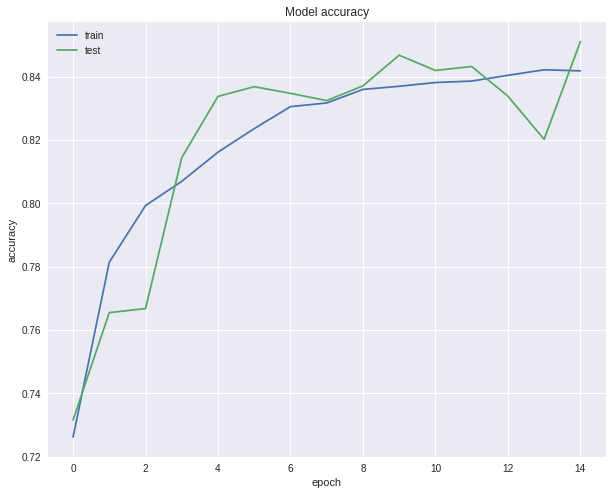

In [0]:
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

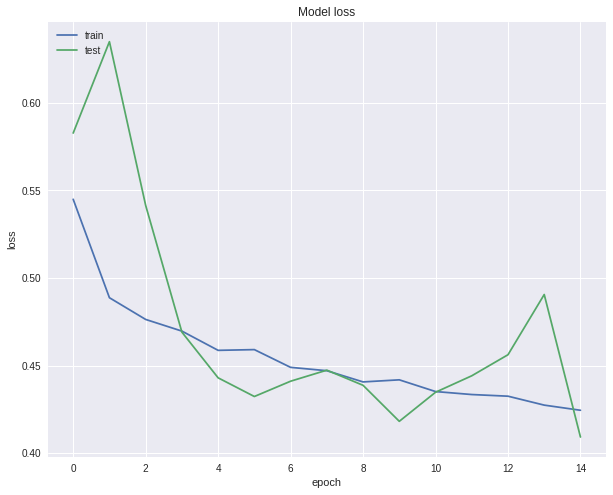

In [0]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

There are some variations of accuracy and loss between train and test predictions.  
But the network does not seem to suffer from overfitting.

## Final model : fit the model on train set

After fitting the model on train-test split, I fitted the model on the entire train set.

In [0]:
import time

start_time = time.time()

model.fit(train_images_data, train_images_label, epochs=20, batch_size=32, verbose=1)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(4,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(4, 56, 56, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(4, 1), dtype=tf.float32, name='activation_6_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for conv2d_input
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f75b0edccc0> []
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 6.963862895965576 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.0010000000474974513 {0.001}
INFO:tensorflow:CP

In [0]:
# Sync model back to CPU
model = model.sync_to_cpu()

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.0010000000474974513
INFO:tensorflow:TPU -> CPU beta_1: 0.8999999761581421
INFO:tensorflow:TPU -> CPU beta_2: 0.9990000128746033
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU epsilon: 1e-07
INFO:tensorflow:TPU -> CPU amsgrad: False


## Function Score

In [0]:
# Performance measure
def compute_pred_score(y_true, y_pred):
    if(y_true.shape[0] != y_pred.shape[0]):
        raise Exception("y_pred and y_true must have the same size")
    tmp = np.unique(y_pred)
    if(tmp.shape[0] > 2):
        raise("y_pred should only contain 0 and 1")
        
    if(tmp.shape[0] == 1):
        if(tmp[0] != 0 and tmp[0] != 1):
            raise Exception("y_pred should only contain 0 and 1")
    else:
        if(tmp[0] != 0 and tmp[1] != 1):
            raise Exception("y_pred should only contain 0 and 1")
    
    y0 = (y_true == 0)
    y1 = (y_true == 1)
    
    acc1 = np.mean(1-y_pred[y0])
    acc2 = np.mean(y_pred[y1])
    
    return (acc1+acc2)/2

## Prediction on test set from train-test split 

In [0]:
# Function returning predict vector from the prediction probability of our model
def fpredict(pred):
    for i in range(0,len(pred)):
        if pred[i] >= 0.5:
            pred[i] = 1
        else:
            pred[i]=0
    return pred

In [0]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred = fpredict(y_pred)

# Score
score = compute_pred_score(y_test, y_pred)
print("Score : ", score)

Score :  0.850511372089386


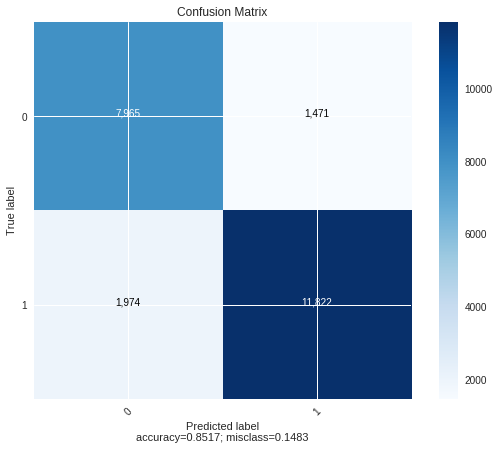

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

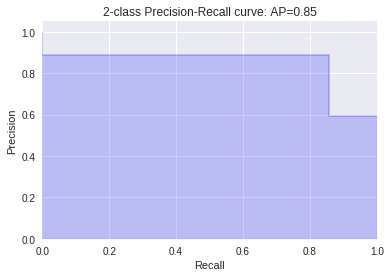

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(score))
plt.show()

## Prediction on final test set with the final model

In [0]:
# Predict on final validation set
val_pred = model.predict(val_images_data)
val_pred = fpredict(val_pred)

In [0]:
np.savetxt('/content/gdrive/My Drive/pred_7.csv', val_pred, fmt = '%1.0d', delimiter=',')